In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importing important files....
import io
import numpy as np
import pandas as pd
import seaborn as sn
from sklearn import tree
from sklearn.svm import SVC
from google.colab import files
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.inspection import permutation_importance
from statistics import mean
from sklearn import tree


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Dataset/combine dataset.xlsx')

In [ ]:
df

,PATNO,EVENT_ID,NP1SLPN,NP1SLPD,NP1PAIN,NP1URIN,NP1CNST,NP1LTHD,NP1FATG,NP2SPCH,NP2SALV,NP2SWAL,NP2EAT,NP2DRES,NP2HYGN,NP2HWRT,NP2HOBB,NP2TURN,NP2TRMR,NP2RISE,NP2WALK,NP2FREZ,NP3SPCH,NP3FACXP,NP3RIGN,NP3RIGRU,NP3RIGLU,PN3RIGRL,NP3RIGLL,NP3FTAPR,NP3FTAPL,NP3HMOVR,NP3HMOVL,NP3PRSPR,NP3PRSPL,NP3TTAPR,NP3TTAPL,NP3LGAGR,NP3LGAGL,NP3RISNG,NP3GAIT,NP3FRZGT,NP3PSTBL,NP3POSTR,NP3BRADY,NP3PTRMR,NP3PTRML,NP3KTRMR,NP3KTRML,NP3RTARU,NP3RTALU,NP3RTARL,NP3RTALL,NP3RTALJ,NP3RTCON,Status
0,3000.0,BL,1.0,2.0,0.0,0.0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,3000.0,V04,0.0,2.0,0.0,1.0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,3000.0,V06,2.0,1.0,0.0,0.0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,3000.0,V08,3.0,2.0,0.0,1.0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,3000.0,V10,1.0,1.0,1.0,1.0,1,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7141,NaN,NaN,2.0,2.0,2.0,0.0,0,0,2,2,4,0,0.0,0.0,0.0,3.0,0.0,1.0,1.0,1.0,0,0,1,2,2.0,1.0,2.0,1.0,2.0,0.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
7142,NaN,NaN,4.0,2.0,3.0,1.0,1,1,3,3,4,1,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1,1,2,2,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,3.0,1
7143,NaN,NaN,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7144,NaN,NaN,0.0,0.0,1.0,0.0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
#feature_names = ['NP1SLPN', 'NP1SLPD','NP1PAIN','NP1URIN','NP1CNST','NP1LTHD','NP1FATG','NP2SPCH','NP2SALV','NP2SWAL','NP2EAT','NP2DRES','NP2HYGN','NP2HWRT','NP2HOBB','NP2TURN','NP2TRMR','NP2RISE','NP2WALK','NP2FREZ','NP3SPCH','NP3FACXP','NP3RIGN','NP3RIGRU','NP3RIGLU','PN3RIGRL','NP3RIGLL','NP3FTAPR','NP3FTAPL','NP3HMOVR','NP3HMOVL','NP3PRSPR','NP3PRSPL','NP3TTAPR','NP3TTAPL','NP3LGAGR','NP3LGAGL','NP3RISNG','NP3GAIT','NP3FRZGT','NP3PSTBL','NP3POSTR','NP3BRADY','NP3PTRMR','NP3PTRML','NP3KTRMR','NP3KTRML','NP3RTARU','NP3RTALU','NP3RTARL','NP3RTALL','NP3RTALJ','NP3RTCON']

#Defining features(X) and labels(Y)....
X = df.drop(['Status','PATNO','EVENT_ID', 'NP1SLPN', 'NP1SLPD','NP1PAIN','NP1URIN','NP1CNST','NP1LTHD','NP1FATG','NP2SPCH','NP2SALV','NP2SWAL','NP2EAT','NP2HYGN','NP2HOBB','NP2TURN','NP2RISE','NP2WALK','NP2FREZ','NP3SPCH','NP3RIGN','NP3RIGRU','PN3RIGRL','NP3RIGLL','NP3FTAPL','NP3HMOVR','NP3HMOVL','NP3PRSPR','NP3TTAPR','NP3TTAPL','NP3LGAGR','NP3LGAGL','NP3RISNG','NP3GAIT','NP3FRZGT','NP3PSTBL','NP3POSTR','NP3PTRMR','NP3PTRML','NP3KTRMR','NP3KTRML','NP3RTARU','NP3RTALU','NP3RTARL','NP3RTALL','NP3RTALJ'],axis =1).values
y = df['Status'].values

In [ ]:
X = pd.DataFrame(X)

In [ ]:
#Checking is any nan value available or not
np.any(np.isnan(X))

True

In [ ]:
#Missing value handle
imputer = SimpleImputer(missing_values = np.NaN, strategy = 'mean')
imputer = imputer.fit(X)
X = imputer.transform(X)
final_dataset = pd.DataFrame(X)
final_dataset

,0,1,2,3,4,5,6,7,8
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
7141,0.0,3.0,1.0,2.0,2.0,0.0,2.0,1.0,0.0
7142,1.0,3.0,1.0,2.0,1.0,1.0,1.0,1.0,3.0
7143,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Feature scaling
feature_X = StandardScaler().fit_transform(X)

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y == 0)))

Before OverSampling, counts of label '1': 5887
Before OverSampling, counts of label '0': 1259 



In [ ]:
#over sampling
sm = SMOTE(random_state = 2)
X_res, y_res = sm.fit_sample(feature_X, y.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_res == 0)))

After OverSampling, the shape of train_X: (11774, 9)
After OverSampling, the shape of train_y: (11774,) 

After OverSampling, counts of label '1': 5887
After OverSampling, counts of label '0': 5887


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#Tr=list()
#Te=list()
#mse=list()
#rmse=list()
#pr=list()
#re=list()
#f=list()

In [ ]:
#Train and test data set split.....
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=0)

In [ ]:
model_XGB = XGBClassifier(ase_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0, gamma=1,
              learning_rate=0.02, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=1, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=True, subsample=0.8, verbosity=1)


In [ ]:
#Fitting the defined model
model_XGB.fit(X_train, y_train)

XGBClassifier(ase_score=0.5, base_score=0.5, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1.0,
              gamma=1, learning_rate=0.02, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=1, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=True, subsample=0.8, verbosity=1)

In [ ]:
#Prediction
y_pred = model_XGB.predict(X_test)

In [ ]:
model_XGB.score(X_train,y_train)

0.9871536256502813

In [ ]:
#Model score
model_XGB.score(X_test,y_test)

0.9796178343949045

[[1174   17]
 [  31 1133]]


Text(69.0, 0.5, 'Truth')

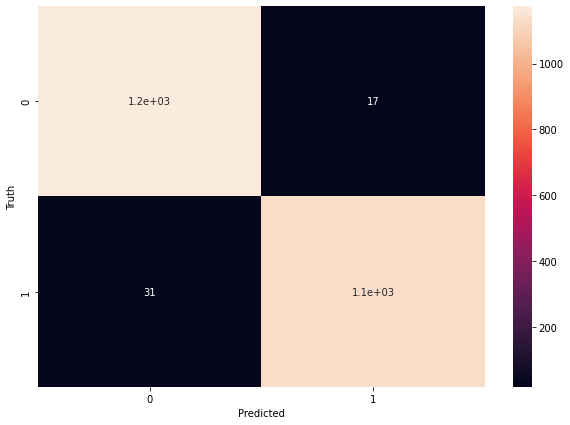

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
%matplotlib inline
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.02038216560509554
MSE: 0.02038216560509554
RMSE: 0.14276612204964992


In [ ]:
#Precision,recall,f1_score,cohen_kappa_score,auc.......
print("Precision,recall,f1 score,cohen kappa score,auc.....")
print(" ")

# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test,y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)

# ROC AUC
auc = roc_auc_score(y_test,  y_pred)
print('ROC AUC: %f' % auc)
print(" ")

Precision,recall,f1 score,cohen kappa score,auc.....
 
Precision: 0.985217
Recall: 0.973368
F1 score: 0.979257
ROC AUC: 0.979547
 


In [ ]:
Tr.append(model_XGB.score(X_train,y_train))
Te.append(model_XGB.score(X_test,y_test))
mse.append(metrics.mean_squared_error(y_test, y_pred))
rmse.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
pr.append(precision_score(y_test, y_pred))
re.append(recall_score(y_test,y_pred))
f.append(f1_score(y_test, y_pred))


In [ ]:
print(Tr)
print(Te)
print(mse)
print(rmse)
print(pr)
print(re)
print(f)

[0.8902218919205861, 0.9426690731500159, 0.9612485401847329, 0.969529674063064, 0.975368935131118, 0.9811020278161163, 0.9830130587111159, 0.9866227837350037, 0.9871536256502813]
[0.8887473460721869, 0.9401273885350319, 0.9617834394904459, 0.9660297239915074, 0.9736730360934183, 0.9736730360934183, 0.9791932059447983, 0.9800424628450106, 0.9796178343949045]
[0.11125265392781317, 0.05987261146496815, 0.03821656050955414, 0.03397027600849257, 0.026326963906581742, 0.026326963906581742, 0.020806794055201697, 0.019957537154989383, 0.02038216560509554]
[0.33354557998542445, 0.24468880535277487, 0.19549056373532236, 0.18431027103363656, 0.16225585939059872, 0.16225585939059872, 0.1442456032439176, 0.14127114763811252, 0.14276612204964992]
[0.9183673469387755, 0.9069212410501193, 0.9769094138543517, 0.9721254355400697, 0.9741824440619621, 0.9701365187713311, 0.9810181190681622, 0.98438855160451, 0.9852173913043478]
[0.8505154639175257, 0.979381443298969, 0.9450171821305842, 0.9587628865979382

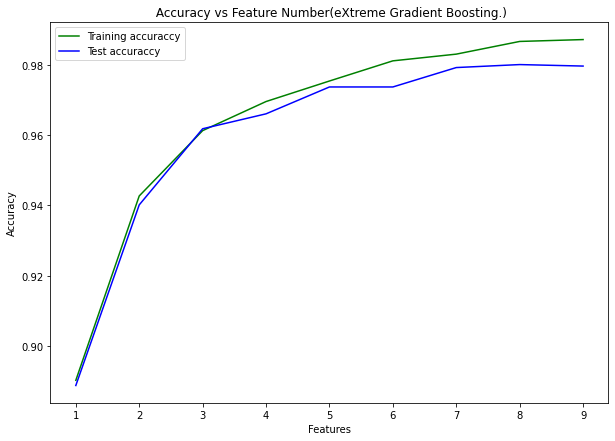

In [ ]:
features = range(1,10)
plt.figure(figsize=(10,7))
plt.plot(features, Tr, 'g', label='Training accuraccy')
plt.plot(features, Te, 'b', label='Test accuraccy')
plt.title(' Accuracy vs Feature Number(eXtreme Gradient Boosting.)')
plt.xlabel('Features')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('XGB_accuraccy_vs_features.png')

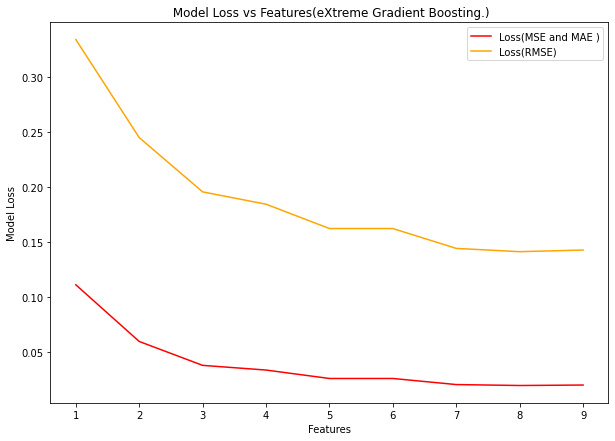

In [ ]:


features = range(1,10)
plt.figure(figsize=(10,7))
plt.plot(features, mse, 'red', label='Loss(MSE and MAE )')
plt.plot(features,rmse, 'orange', label='Loss(RMSE)')
plt.title(' Model Loss vs Features(eXtreme Gradient Boosting.)')
plt.xlabel('Features')
plt.ylabel('Model Loss')
plt.legend()
plt.savefig('XGB_loss_vs_features.png')

In [ ]:
import pickle
pickle.dump(model_XGB, open("model_xgb_last_1.pkl", "wb"))

In [ ]:
# load the model
model = pickle.load(open("model_xgb_last_1.pkl", "rb"))

# use model to predict
model.score(X_test,y_test)

0.9796178343949045